In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt

# actual labels
actual = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

# generate threshold based on the feature value
# 0 to 1 with 0.1 gap: [0., 0.1, 0.2, ... , 0.9]
thresholds = np.arange(0, 1, 0.1)
print(f"{thresholds=}")

feature = [0.7, 0.7, 0.9, 0.7, 0.6, 0.6, 0.1, 0.4, 0.3, 0.3]

tpr_ls = []
fpr_ls = []

# for every threshold that matters
for i in thresholds:

    # predicted labels
    # if bigger than or equal to i then it is true otherwise it is false
    predicted = np.where(feature >= i, 1, 0)

    # calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()

    # calculate TPR and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    tpr_ls.append(tpr)
    fpr_ls.append(fpr)

thresholds=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


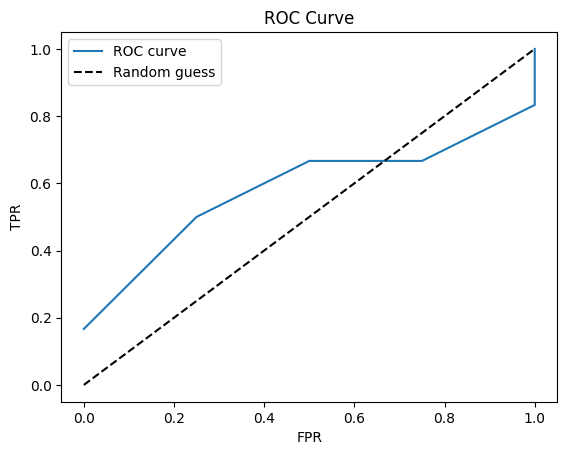

AUC: 0.5833333333333333


In [ ]:
# plot the graph
plt.plot(fpr_ls, tpr_ls, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

# calculate the area under the curve
roc_auc = auc(fpr_ls, tpr_ls)
print("AUC:", roc_auc)